<a href="https://colab.research.google.com/github/Chandramani05/NBA-Games-Data-Analysis-and-Match-Prediction/blob/main/NBA_Machine_learning_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import matplotlib.pyplot as plt

In [5]:
def npv_score(y_test, y_pred):
    true_negatives = np.unique(np.array(list(zip(y_test.values, y_pred))).sum(axis=1), return_counts=True)[1][0]
    predicted_negatives = np.unique(y_pred, return_counts=True)[1][0]
    npv = true_negatives / predicted_negatives
    return npv

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /Final Data/games_with_features.csv", index_col="id")

In [7]:
lr = LogisticRegression(max_iter=1000)
nb = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier(eval_metric="logloss", use_label_encoder=False)

models = [lr, nb, knn, rf, xgb]

In [8]:
def train_model(model, train_data, test_data):
    X_train = train_data.drop("winner", axis=1)
    y_train = train_data["winner"]
    X_test = test_data.drop("winner", axis=1)
    y_test = test_data["winner"]                     

    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(accuracy_score(y_test, y_pred))
    #print(cross_val_score(model, feats, target).mean())

In [9]:
train_data = df[df["season"].isin([2017])][["home_team_avg_score", "visitor_team_avg_score", "winner"]]
test_data = df[df["season"].isin([2018])][["home_team_avg_score", "visitor_team_avg_score", "winner"]]
for model in models:
    train_model(model, train_data, test_data)

0.6399694889397407
0.6414950419527079
0.5537757437070938
0.5301296720061022
0.6018306636155606


xgboost and random forest predict around 80% correctly when using data from the same season.
unfortunately when trying to predict results of future seasons the result is horrible.

##Using Stats Data

In [10]:
stats = pd.read_csv("/content/drive/MyDrive/Machine Learning NBA /Final Data/stats_feats.csv",index_col="game.id")
stats

,game.date,game.season,winner,home_ast,home_blk,home_dreb,home_fg3_pct,home_fg3a,home_fg3m,home_fg_pct,...,diff_away_fgm,diff_away_ft_pct,diff_away_fta,diff_away_ftm,diff_away_oreb,diff_away_pf,diff_away_pts,diff_away_reb,diff_away_stl,diff_away_turnover
game.id,,,,,,,,,,,,,,,,,,,,,
1,2018-10-16,2018,1,23.40,5.35,36.05,0.283508,32.10,11.60,0.407498,...,-1.10,-0.084629,-2.80,-1.85,-2.30,-0.95,-3.30,-0.45,-0.95,-2.65
2,2018-10-16,2018,1,31.55,7.60,34.45,0.186014,27.60,11.35,0.511330,...,2.00,0.031878,-2.45,0.15,-3.90,-1.20,4.30,-2.25,-0.15,3.15
3,2018-10-17,2018,0,21.35,5.15,35.85,0.211261,26.70,9.45,0.415333,...,0.90,0.082519,3.55,2.55,0.25,-4.50,5.20,4.10,-2.35,-2.95
4,2018-10-17,2018,1,23.15,3.40,33.55,0.239457,28.45,11.50,0.431416,...,1.50,-0.106143,-5.10,-4.75,0.15,-2.80,-0.50,-1.75,0.60,-3.30
5,2018-10-17,2018,1,22.55,4.25,33.20,0.291932,25.80,10.00,0.453450,...,5.40,0.003677,-0.10,-1.25,-0.20,-5.05,10.15,3.00,1.15,-1.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857658,2022-11-28,2022,0,25.85,4.40,32.05,20.284341,33.80,12.50,32.655897,...,-2.90,0.107326,6.50,4.85,-2.55,-3.30,1.05,-2.90,-0.80,0.60
857659,2022-11-28,2022,0,24.95,4.80,34.45,13.977462,39.25,14.65,28.952156,...,0.20,-10.664621,7.10,4.05,2.30,1.70,7.35,3.10,0.35,1.40
857660,2022-11-28,2022,0,22.90,6.00,33.20,24.626431,33.05,10.85,42.398149,...,1.50,2.393646,-1.20,-1.55,-1.85,-0.80,0.15,-2.45,1.05,-1.80


In [11]:
train = stats[stats["game.season"].isin([2015,2016,2017,2018,2019,2020,2021])]
test = stats[stats["game.season"].eq(2022)]

In [12]:
X_train = train.drop(["winner", "game.date", "game.season"], axis=1)
y_train = train["winner"]
X_test = test.drop(["winner", "game.date", "game.season"], axis=1)
y_test = test["winner"]

In [13]:
for model in models:
    model = model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print(model)
    print(accuracy_score(y_train, y_train_pred))
    print(accuracy_score(y_test, y_pred))
    print(cross_val_score(model, X_test, y_test).mean())

LogisticRegression(max_iter=1000)
0.6240945057394406
0.6298701298701299
0.6233209941829719
GaussianNB()
0.5854229354730859
0.487012987012987
0.47778952934955043
KNeighborsClassifier()
0.7218321631561351
0.6071428571428571
0.55193019566367
RandomForestClassifier()
1.0
0.6006493506493507
0.5682707562136435
XGBClassifier(eval_metric='logloss', use_label_encoder=False)
0.6895129833946283
0.5876623376623377
0.5585933368588047


##Using All Stats in XGBoost wit GridSearchCV

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelBinarizer, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

In [15]:
# Now we will recode categorical features for further analysis

# Let's write a function that accepts DataFrame as input, encode categorical features with numeric values and returns the updated DataFrame and the encoders themselves.

def nef(init_df):
    result = init_df.copy() # copy of our original table
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # if the column type is a string, then it is encoded
            encoders[column] = LabelEncoder() # creating an encoder for the column
            result[column] = encoders[column].fit_transform(result[column]) # apply the encoder to the column and overwrite the column
    return result, encoders

nba_encoded, encoders = nef(stats) # Now encoded data contains encoded categorical signs 
nba_encoded.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


,game.date,game.season,winner,home_ast,home_blk,home_dreb,home_fg3_pct,home_fg3a,home_fg3m,home_fg_pct,...,diff_away_fgm,diff_away_ft_pct,diff_away_fta,diff_away_ftm,diff_away_oreb,diff_away_pf,diff_away_pts,diff_away_reb,diff_away_stl,diff_away_turnover
game.id,,,,,,,,,,,,,,,,,,,,,
1,7004,2018,1,23.40,5.35,36.05,0.283508,32.10,11.60,0.407498,...,-1.1,-0.084629,-2.80,-1.85,-2.30,-0.95,-3.30,-0.45,-0.95,-2.65
2,7004,2018,1,31.55,7.60,34.45,0.186014,27.60,11.35,0.511330,...,2.0,0.031878,-2.45,0.15,-3.90,-1.20,4.30,-2.25,-0.15,3.15
3,7005,2018,0,21.35,5.15,35.85,0.211261,26.70,9.45,0.415333,...,0.9,0.082519,3.55,2.55,0.25,-4.50,5.20,4.10,-2.35,-2.95
4,7005,2018,1,23.15,3.40,33.55,0.239457,28.45,11.50,0.431416,...,1.5,-0.106143,-5.10,-4.75,0.15,-2.80,-0.50,-1.75,0.60,-3.30
5,7005,2018,1,22.55,4.25,33.20,0.291932,25.80,10.00,0.453450,...,5.4,0.003677,-0.10,-1.25,-0.20,-5.05,10.15,3.00,1.15,-1.50


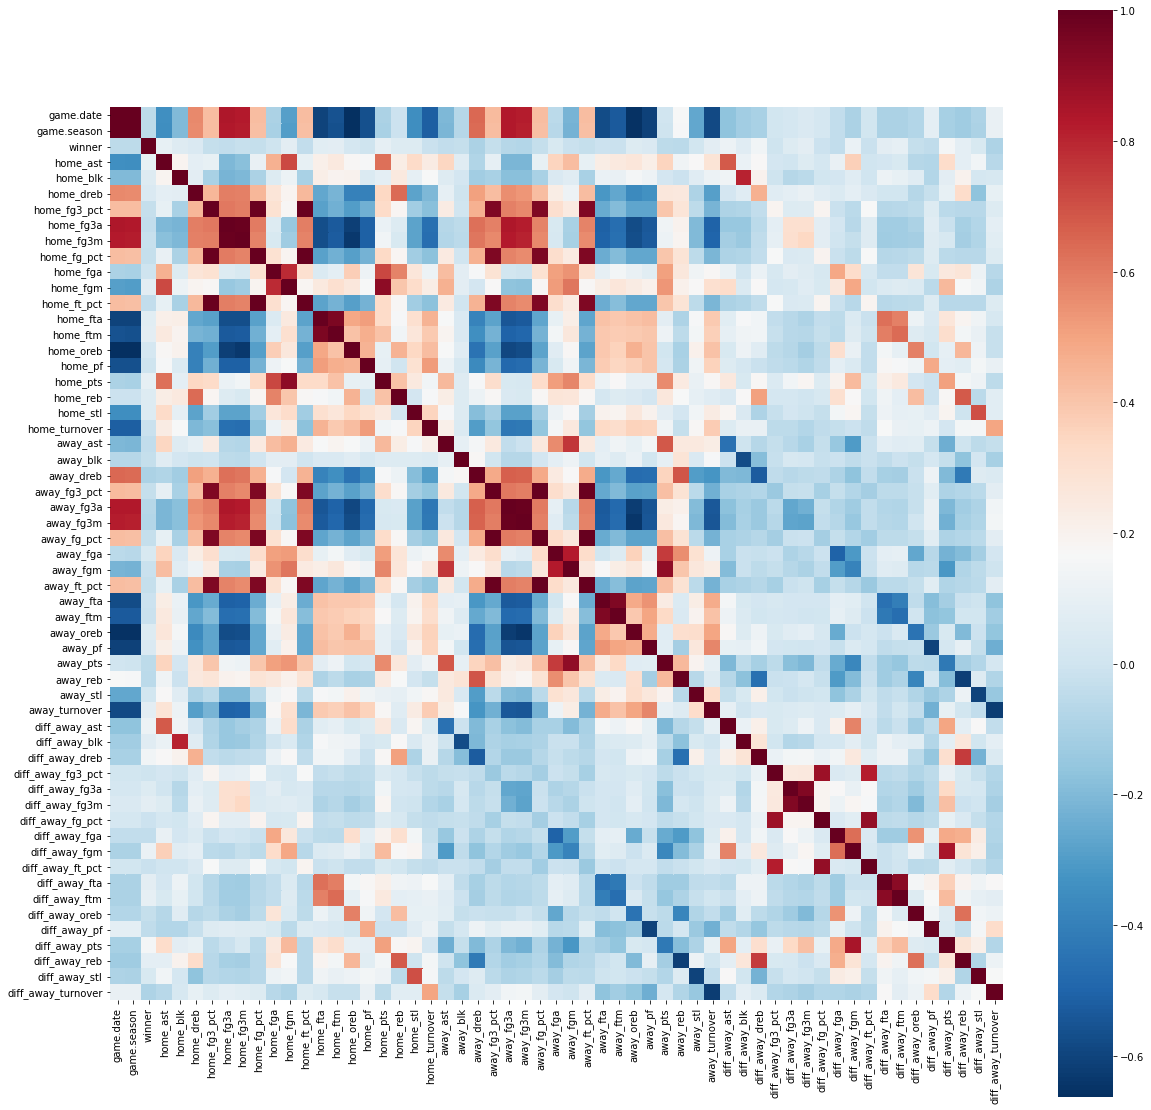

In [16]:
plt.subplots(figsize=(20,20))
sns.heatmap(nba_encoded.corr(), square=True, cmap="RdBu_r")
plt.savefig("/content/drive/MyDrive/Exoplanet Detection/Figures/heatmap")
plt.show()



##Gaps in DataSet

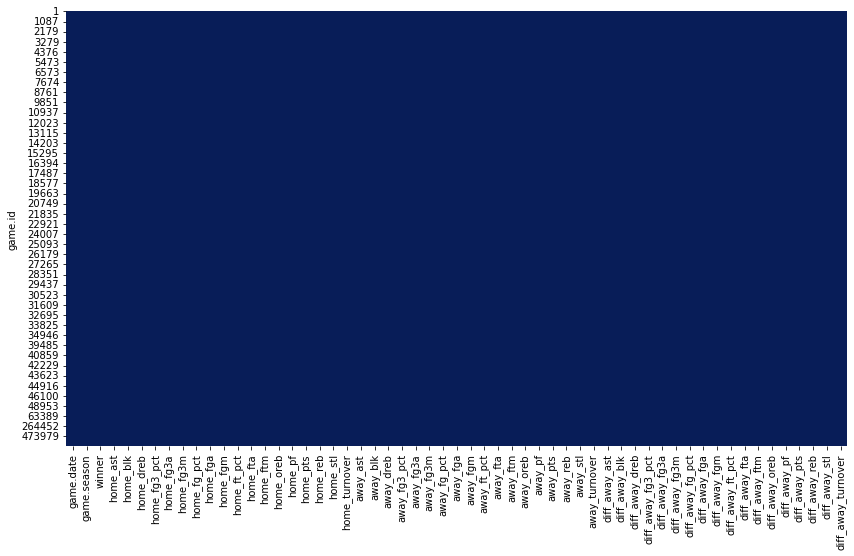

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(nba_encoded.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = stats.drop(["winner", "game.date", "game.season"], axis=1)
y = stats["winner"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)


In [26]:
xgb = XGBClassifier(random_state=7)
xgb_steps = [('scaler', StandardScaler()), ('XGB', xgb)]
xgb_pipeline = Pipeline(xgb_steps)

# paramater space to tune
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_depth = [3, 4, 5, 6, 8, 10, 12, 15]
learning_rate = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
min_child_weight = [1, 3, 5, 7]
gamma = [0.0, 0.1, 0.2 , 0.3, 0.4]
colsample_bytree = [0.3, 0.4, 0.5 , 0.7]

xgb_param_grid = {'XGB__max_depth': max_depth, 
                  'XGB__learning_rate': learning_rate, 
                  'XGB__n_estimators': n_estimators, 
                  'XGB__gamma': gamma, 
                  'XGB__min_child_weight': min_child_weight, 
                  'XGB__colsample_bytree': colsample_bytree,
}

In [27]:
%%time
# find best parameters and apply 5 fold cross validation with RandomizedSearchCV
xgb_cv = RandomizedSearchCV(xgb_pipeline, xgb_param_grid, scoring='average_precision', cv=5, random_state=42)
xgb_cv.fit(X_train, y_train)

CPU times: user 44min 42s, sys: 4.67 s, total: 44min 47s
Wall time: 44min 38s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('XGB',
                                              XGBClassifier(random_state=7))]),
                   param_distributions={'XGB__colsample_bytree': [0.3, 0.4, 0.5,
                                                                  0.7],
                                        'XGB__gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'XGB__learning_rate': [0.05, 0.1, 0.15,
                                                               0.2, 0.25, 0.3],
                                        'XGB__max_depth': [3, 4, 5, 6, 8, 10,
                                                           12, 15],
                                        'XGB__min_child_weight': [1, 3, 5, 7],
                                        'XGB__n_estimators': [200, 400, 600,
                                                              800, 1000

In [28]:
y_train_pred = xgb_cv.predict(X_train)
y_pred = xgb_cv.predict(X_test)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(npv_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7448443944506936
0.6503481521156936
0.67691647597254
0.5710627400768246
[[1338 2259]
 [1005 4733]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1152x432 with 0 Axes>

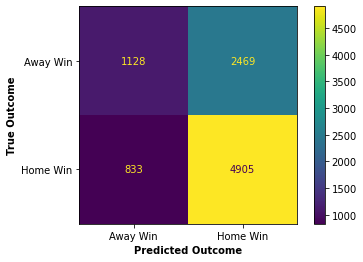

In [32]:
plt.figure(figsize=(16,6))
plot_confusion_matrix(lr, X_test, y_test)
plt.ylabel("True Outcome",fontdict = {'weight' : 'bold'})
plt.yticks(ticks=[0,1], labels=["Away Win", "Home Win"])
plt.xticks(ticks=[0,1], labels=["Away Win", "Home Win"])
plt.xlabel("Predicted Outcome", fontdict = {'weight' : 'bold'})
plt.savefig('/content/drive/MyDrive/Machine Learning NBA /Figures/Confusion Matrix')
plt.show()

In [33]:
import pickle

In [34]:
NBA_results_predictor = xgb_cv.fit(X, y)

pickle.dump(NBA_results_predictor, open("/content/drive/MyDrive/Machine Learning NBA /Models/model.sav", "wb"))